In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [3]:
print("Sample Raw : ", df['Tweet'][2])

Sample Raw :  Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News


In [4]:
import string
import re

def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [5]:
df["Tweet"] = df["Tweet"].apply(tweet_clean)
df.head(5)

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [6]:
#!pip3 install spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm

  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 4.4.0 which is incompatible.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.9 MB/s eta 0:00:0000:0100:01m


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import nltk
import spacy

from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):
    
    stop_words = nlp.Defaults.stop_words     
    rm_stop_words_lemma = []
    
    doc = nlp(tweet)
    for token in doc:                                            # tokenization
        if token.text not in stop_words and token.pos_!="PUNCT": 
            lemma_word = lemmatizer.lemmatize(token.text)        # removing stop
            rm_stop_words_lemma.append(lemma_word)               # lemmatizing words 
            
    processed = " ".join(rm_stop_words_lemma)
    return processed

In [8]:
tweet = df['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Sample    : ",cleaned)
print("Processed : ",tweet_preprocessing(cleaned))

Sample    :  democracy plaza in the wake of a stunning outcome decision  nbc news
Processed :  democracy plaza wake stunning outcome decision   nbc news


In [9]:
df["Tweet"] = df["Tweet"].apply(tweet_clean)
df.head(5)

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [17]:
df = pd.read_csv("data/stp_lm.csv")
df.dropna(inplace=True)

In [18]:
#!pip3 install -U scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
c_vect = CountVectorizer()
X= c_vect.fit_transform(df["Tweet"])
c_vect.get_feature_names()[100:110]

/opt/anaconda3/envs/AraProje2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['absence',
 'absentee',
 'absinthe',
 'absolut',
 'absolute',
 'absolutely',
 'absolutelybesutifulflower',
 'absolutelythem',
 'absolutly',
 'abstract']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

df_mini = df.iloc[:10]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini["Tweet"])

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names()

count_vec

,amp,away,beating,best,birthday,cause,congrats,couscous,cousinlove,decision,...,veggie,vilo,wake,wall,walt,water,west,wisconsin,yesterday,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
y = df["Label"].values

In [21]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=101)
X,y = os.fit_resample(X, y)

In [22]:
from sklearn.model_selection import train_test_split

#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [23]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (182886, 54353)
Training y Dim  (182886,)


In [ ]:
########### ROS############

In [15]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_osm, y_train_osm = os.fit_resample(X_train, y_train)

In [ ]:
######### ROS END##########

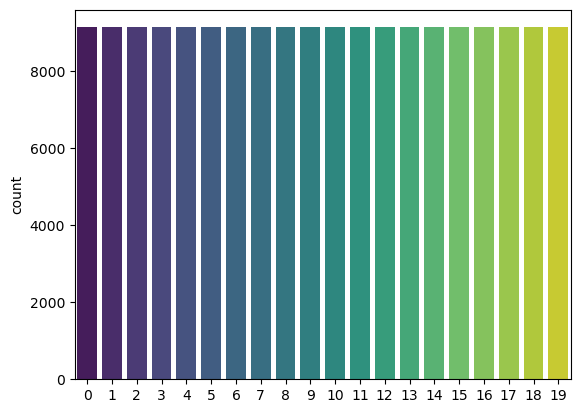

In [25]:
sns.countplot(x=y_train, palette="viridis")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC()
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

In [27]:
clf.fit(X_train, y_train)

NameError: name 'X_train_osm' is not defined

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

NameError: name 'cm' is not defined

<Figure size 1000x700 with 0 Axes>

In [30]:
print(classification_report(y_test, y_predict_test))

NameError: name 'y_predict_test' is not defined